In [ ]:
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

import re
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
!pip install .

nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [ ]:
import collections

In [ ]:
data = pd.read_csv('./drive/My Drive/Predictions.csv')

In [ ]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9\']+"
def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(token)
    text = " ".join(tokens)
    return text

In [ ]:
data.head()

,date,time,text,place,coordinates,country,clean_txt,labels,emotions
0,2020-03-20,03:55:54,Corona day 3: it just feels like Sunday again ...,NaN,NaN,NaN,corona day 3 it just feels like sunday again a...,0,Sadness
1,2020-03-20,03:55:56,Can everyone just stay at home please so that ...,NaN,NaN,NaN,can everyone just stay at home please so that ...,4,Anger
2,2020-03-20,03:55:54,Hundreds of Indian doctors are on the frontlin...,NaN,NaN,NaN,hundreds of indian doctors are on the frontlin...,0,Sadness
3,2020-03-20,03:55:55,"@kalamojakka @prayingmedic Literally, a spokes...",NaN,NaN,NaN,literally a spokesperson for them was at my sc...,0,Sadness
4,2020-03-20,03:55:54,Coronavirus is a basic or general name for the...,NaN,NaN,NaN,coronavirus is a basic or general name for the...,4,Anger


In [ ]:
pk_data = data[data.country == 'Pakistan']

In [ ]:
anger = pk_data[pk_data.emotions == 'Anger']
fear = pk_data[pk_data.emotions == 'Fear']
sad = pk_data[pk_data.emotions == 'Sadness']
anlt = pk_data[pk_data.emotions == 'Analytical']
conf = pk_data[pk_data.emotions == 'Confident']

In [ ]:
conf.clean_txt = conf.clean_txt.apply(lambda x: preprocess(x))

In [ ]:
text = " ".join(cl for cl in conf.clean_txt)
words = text.split(' ')
counts_no_urls = collections.Counter(words)

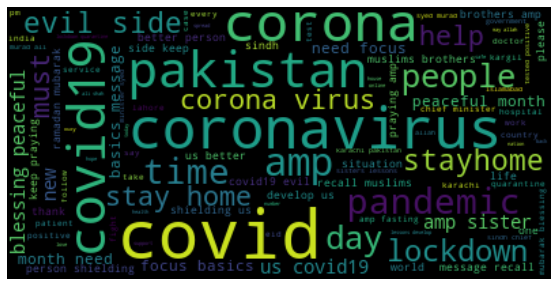

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=220, background_color="black").generate(text)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('confident_word_cloud.png',bbox_inches='tight',pad_inches = 0.05, dpi = 400)
plt.show()

In [ ]:
!cp -r "confident_word_cloud.png" "./drive/My Drive"
!cp -r "sad_word_cloud.png" "./drive/My Drive"
!cp -r "fear_word_cloud.png" "./drive/My Drive"
!cp -r "anlytical_word_cloud.png" "./drive/My Drive"
!cp -r "anger_word_cloud.png" "./drive/My Drive"